<a href="https://colab.research.google.com/github/Bartup/MIW/blob/main/MIW_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y=to_categorical(y)

#norm=np.linalg.norm(y)
#y/=norm

print(np.shape(X))
print(np.shape(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

(150, 4)
(150, 3)


In [ ]:
np.random.seed(5)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights randomly between -1 and 1
        self.weights_ih = np.random.uniform(-1, 1, (self.hidden_size, self.input_size))
        self.weights_ho = np.random.uniform(-1, 1, (self.output_size, self.hidden_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
        
    def feedforward(self, inputs):
        hidden = self.sigmoid(np.dot(self.weights_ih, inputs))
        output = self.sigmoid(np.dot(self.weights_ho, hidden))
        return output
    
    def train(self, inputs, targets, learning_rate):
        # Feedforward
        hidden = self.sigmoid(np.dot(self.weights_ih, inputs))
        output = self.sigmoid(np.dot(self.weights_ho, hidden))
        
        # Backpropagation
        output_error = targets - output
        output_delta = output_error * self.sigmoid_derivative(output)
        self.error_to_show = output_error
        
        hidden_error = np.dot(self.weights_ho.T, output_delta)
        hidden_delta = hidden_error * self.sigmoid_derivative(hidden)
        
        # Update weights
        self.weights_ho += learning_rate * np.outer(output_delta, hidden)
        self.weights_ih += learning_rate * np.outer(hidden_delta, inputs)

    def predict(self, inputs):
        output = self.feedforward(inputs)
        return np.argmax(output)

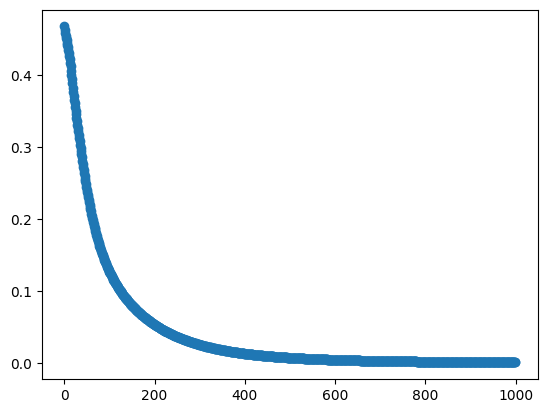

In [ ]:
nn = NeuralNetwork(input_size=4, hidden_size=3, output_size=3)
err = []
inx = []

for i in range(1000):
  for index in range(len(X_train)):
    nn.train(X_train[index], y_train[index], 0.01)
    
  err.append(min(abs(nn.error_to_show)))
  inx.append(i)


plt.scatter(inx, err)

In [ ]:
epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200]
#epochs = [100, 200, 300]
scores = []

for epoch in epochs:
  nn = NeuralNetwork(input_size=4, hidden_size=3, output_size=3)

  for i in range(epoch):
    for index in range(len(X_train)):
      nn.train(X_train[index], y_train[index], 0.01)
  

  accuracy = 0
  for index in range(len(X_test)):
    predicted_class = nn.predict(X_test[index])
    actual_class = np.argmax(y_test[index])
    if predicted_class == actual_class:
      accuracy = accuracy + 1

  scores.append(accuracy/len(X_test))

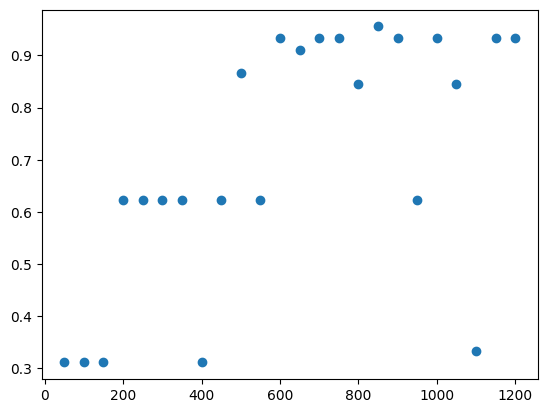

In [ ]:
#sns.scatterplot(x=epochs, y=scores)
plt.scatter(epochs, scores)

#################################

Liniowa funkcja aktywacji


In [ ]:
class NeuralNetworkLinear:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights randomly between -1 and 1
        self.weights_ih = np.random.uniform(-1, 1, (self.hidden_size, self.input_size))
        self.weights_ho = np.random.uniform(-1, 1, (self.output_size, self.hidden_size))
        
    def linear(self, x):
        return 1 / (1 + np.exp(-x))
    
    def linear_derivative(self, x):
        return x * (1 - x)
        
    def feedforward(self, inputs):
        hidden = self.linear(np.dot(self.weights_ih, inputs))
        output = self.linear(np.dot(self.weights_ho, hidden))
        return output
    
    def train(self, inputs, targets, learning_rate):
        # Feedforward
        hidden = self.linear(np.dot(self.weights_ih, inputs))
        output = self.linear(np.dot(self.weights_ho, hidden))
        
        # Backpropagation
        output_error = targets - output
        output_delta = output_error * self.linear_derivative(output)
        self.error_to_show = output_error
        
        hidden_error = np.dot(self.weights_ho.T, output_delta)
        hidden_delta = hidden_error * self.linear_derivative(hidden)
        
        # Update weights
        self.weights_ho += learning_rate * np.outer(output_delta, hidden)
        self.weights_ih += learning_rate * np.outer(hidden_delta, inputs)

    def predict(self, inputs):
        output = self.feedforward(inputs)
        return np.argmax(output)

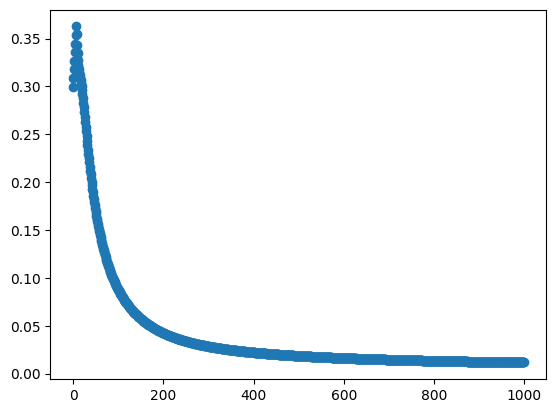

In [ ]:
nn = NeuralNetworkLinear(input_size=4, hidden_size=3, output_size=3)
err = []
inx = []

for i in range(1000):
  for index in range(len(X_train)):
    nn.train(X_train[index], y_train[index], 0.01)
    
  err.append(min(abs(nn.error_to_show)))
  inx.append(i)


plt.scatter(inx, err)

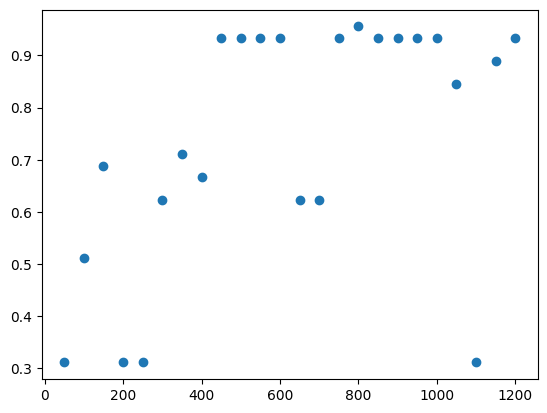

In [ ]:
epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200]
#epochs = [100, 200, 300]
scores = []

for epoch in epochs:
  nn = NeuralNetworkLinear(input_size=4, hidden_size=3, output_size=3)

  for i in range(epoch):
    for index in range(len(X_train)):
      nn.train(X_train[index], y_train[index], 0.01)
  

  accuracy = 0
  for index in range(len(X_test)):
    predicted_class = nn.predict(X_test[index])
    actual_class = np.argmax(y_test[index])
    if predicted_class == actual_class:
      accuracy = accuracy + 1

  scores.append(accuracy/len(X_test))

plt.scatter(epochs, scores)